In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import struct
import subprocess
import sys
from matplotlib.patches import Rectangle

In [2]:
base_dir = os.getcwd()
exec_dir = '..'

In [3]:
sizes = [int(x) for x in np.linspace(1000, 100000, 25)]
print(sizes)

[1000, 5125, 9250, 13375, 17500, 21625, 25750, 29875, 34000, 38125, 42250, 46375, 50500, 54625, 58750, 62875, 67000, 71125, 75250, 79375, 83500, 87625, 91750, 95875, 100000]


# Construction test 1

First experiment: keep the page capacity constant and change the number of input records. Then measure how the construction time varies.

In [8]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file1, header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
     m &   time \\
\midrule
  1000 &  0.596 \\
  5125 &  2.818 \\
  9250 &  4.975 \\
 13375 &  7.031 \\
 17500 &  9.060 \\
 21625 & 11.225 \\
 25750 & 13.586 \\
 29875 & 15.943 \\
 34000 & 18.128 \\
 38125 & 20.459 \\
 42250 & 23.194 \\
 46375 & 25.245 \\
 50500 & 27.511 \\
 54625 & 29.621 \\
 58750 & 32.160 \\
 62875 & 34.670 \\
 67000 & 36.635 \\
 71125 & 38.940 \\
 75250 & 41.601 \\
 79375 & 44.264 \\
 83500 & 46.400 \\
 87625 & 48.120 \\
 91750 & 51.179 \\
 95875 & 52.915 \\
100000 & 56.111 \\
\bottomrule
\end{tabular}



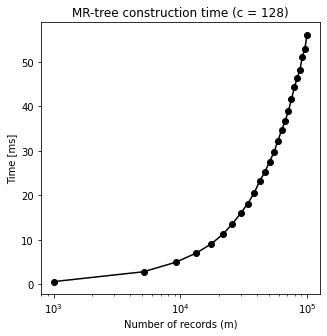

In [9]:
# Generate a plot.
plt.figure(figsize=(5, 5))
plt.title("MR-tree construction time (c = 128)")
plt.xscale('log')
plt.plot(df1['m'], df1['time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("{}/test_construction/test-construction.pdf".format(base_dir), format='pdf', bbox_inches='tight')

# Construction test 2

We fix the number of records $m$ and change the capacity $c$.

In [18]:
m = 30000
n_trials = 20
input_file2 = '{}/data/crash_data_{}.csv'.format(base_dir, m)
output_file2 = '{}/test_construction/test_construction_capacity.csv'.format(base_dir)
capacities = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
#capacities = list(range(10, 250, 10))
print(capacities)

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [20]:
# Print the results.
df2 = pd.read_csv(output_file2)
# Divide by 1000 to convert microseconds to milliseconds.
df2['avg_time'] /= 1000
# Round the execution times to 3 decimal places.
df2 = df2.round({'avg_time': 3})
# Convert leaves and height columns to integer type.
df2 = df2.astype({'leaves': int, 'height': int})
print(df2.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
   c &  leaves &  height &  avg\_time \\
\midrule
   4 &    7500 &       7 &    25.102 \\
   8 &    3750 &       4 &    19.829 \\
  16 &    1875 &       3 &    17.233 \\
  32 &     938 &       2 &    15.994 \\
  64 &     469 &       2 &    15.671 \\
 128 &     235 &       2 &    15.274 \\
 256 &     118 &       1 &    15.036 \\
 512 &      59 &       1 &    16.352 \\
1024 &      30 &       1 &    15.955 \\
2048 &      15 &       1 &    16.095 \\
\bottomrule
\end{tabular}

